# Perkenalan

**Anggota Kelompok**

1. Fachriansyah Muhammad Haikal (PYTN-KS14-010)
2. Fakhrurrozi (PYTN-KS14-018)
3. Safira Alya Fafaza (PYTN-KS14-017)

**Latar Belakang**

Dataset Credit Card Dataset for Clustering adalah kumpulan data yang digunakan untuk melakukan analisis klastering pada data kartu kredit. Dataset ini mengandung informasi tentang 9000 pengguna kartu kredit yang terdiri dari 18 variabel seperti limit kredit, jumlah tagihan, jumlah pembayaran, dan sebagainya.

Dataset ini dibuat untuk tujuan penelitian dan pengembangan metode klastering pada data kartu kredit. Dengan menggunakan dataset ini, dapat dilakukan analisis untuk mengetahui pola penggunaan kartu kredit dan mengidentifikasi kelompok pengguna kartu kredit yang memiliki karakteristik serupa. Analisis ini dapat membantu perusahaan kartu kredit dalam pengambilan keputusan strategis seperti pengembangan produk, pemasaran, dan manajemen risiko.

**Dataset**

Dataset yang digunakan dalam projek ini adalah transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Dataset ini berjumlah 8980 dengan 18 atribut. Pada projek ini atribut yang akan digunakan dan diperlukan untuk membuat clustering sebanyak 17 antara lain sebagai berikut :

1. BALANCE - Balance amount left in their account to make purchases (
2. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
3. PURCHASES - Amount of purchases made from account
4. ONEOFFPURCHASES - Maximum purchase amount done in one-go
5. INSTALLMENTSPURCHASES - Amount of purchase done in installment
6. CASHADVANCE - Cash in advance given by the user
7. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
8. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
9. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
10. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
11. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
12. PURCHASESTRX - Number of purchase transactions made
13. CREDITLIMIT - Limit of Credit Card for user
14. PAYMENTS - Amount of Payment done by user
15. MINIMUM_PAYMENTS - Minimum amount of payments made by user
16. PRCFULLPAYMENT - Percent of full payment paid by user
17. TENURE - Tenure of credit card service for user

**Objektif**

* memahami konsep Clustering dengan menggunakan Scikit-Learn
* menemukan kelompok-kelompok berdasarkan dataset Card Credit
* memberikan wawasan yang dapat bermanfaat bagi masyarakat

# Import Library

In [1]:
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score

# Data Loading

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# jumlah data dan kolom
df.shape

(8950, 18)

Dapat diketahui bahwa terdapat 8950 baris dan 18 kolom pada dataset CC General

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Data Cleansing

## Hapus Kolom yang Tidak Digunakan

In [5]:
# menghapus kolom Date
df.drop('CUST_ID',axis=1, inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Cek Data Kosong

In [6]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df_missValue = pd.DataFrame({"MissingValue":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
df_missValue

,MissingValue,Percent
BALANCE,0,0.0 %
BALANCE_FREQUENCY,0,0.0 %
PURCHASES,0,0.0 %
ONEOFF_PURCHASES,0,0.0 %
INSTALLMENTS_PURCHASES,0,0.0 %
CASH_ADVANCE,0,0.0 %
PURCHASES_FREQUENCY,0,0.0 %
ONEOFF_PURCHASES_FREQUENCY,0,0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.0 %
CASH_ADVANCE_FREQUENCY,0,0.0 %


Dapat diketahui bahwa terdapat data kosong pada atribut CREDIT_LIMIT sebesar 0.01% dan pada atribut MINIMUM_PAYMENTS sebesar 3.5%

In [8]:
# mengisi data kosong yang persentasenya dibawah 30%
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [9]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Cek Data Duplikat

In [10]:
df.duplicated().sum()

0

Dapat diketahui bahwa tidak ada duplikat pada dataset CC General

## Cek One Unique Value

In [11]:
for column in df.columns:
    print(column, df[column].nunique())

BALANCE 8871
BALANCE_FREQUENCY 43
PURCHASES 6203
ONEOFF_PURCHASES 4014
INSTALLMENTS_PURCHASES 4452
CASH_ADVANCE 4323
PURCHASES_FREQUENCY 47
ONEOFF_PURCHASES_FREQUENCY 47
PURCHASES_INSTALLMENTS_FREQUENCY 47
CASH_ADVANCE_FREQUENCY 54
CASH_ADVANCE_TRX 65
PURCHASES_TRX 173
CREDIT_LIMIT 206
PAYMENTS 8711
MINIMUM_PAYMENTS 8637
PRC_FULL_PAYMENT 47
TENURE 7


Dapat diketahui bahwa atribut yang ada tidak ditemukan one unique value sehingga tidak perlu ada yang dihapus. Namun karena pada atribut TENURE hanya memiliki 7 unique value maka perlu diubah tipe datanya menjadi object.

# Eksplorasi Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

## Analisa Deskriptif

In [13]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Numerical Features

In [14]:
numerical_features = [feature for feature in df.columns if (
    df[feature].dtypes != "O")]
print(numerical_features)
print(f"Terdapat {len(numerical_features)} Numerical Features")

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
Terdapat 17 Numerical Features


In [15]:
discrete_feature = [
    feature for feature in numerical_features if df[feature].nunique() < 25]
print(discrete_feature)
print(f"Terdapat {len(discrete_feature)} Discrete Numerical Features")

['TENURE']
Terdapat 1 Discrete Numerical Features


In [16]:
continuous_features = [
    feature for feature in numerical_features if feature not in discrete_feature]
print(continuous_features)
print(f"Terdapat {len(continuous_features)} Continuous Feature")

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
Terdapat 16 Continuous Feature


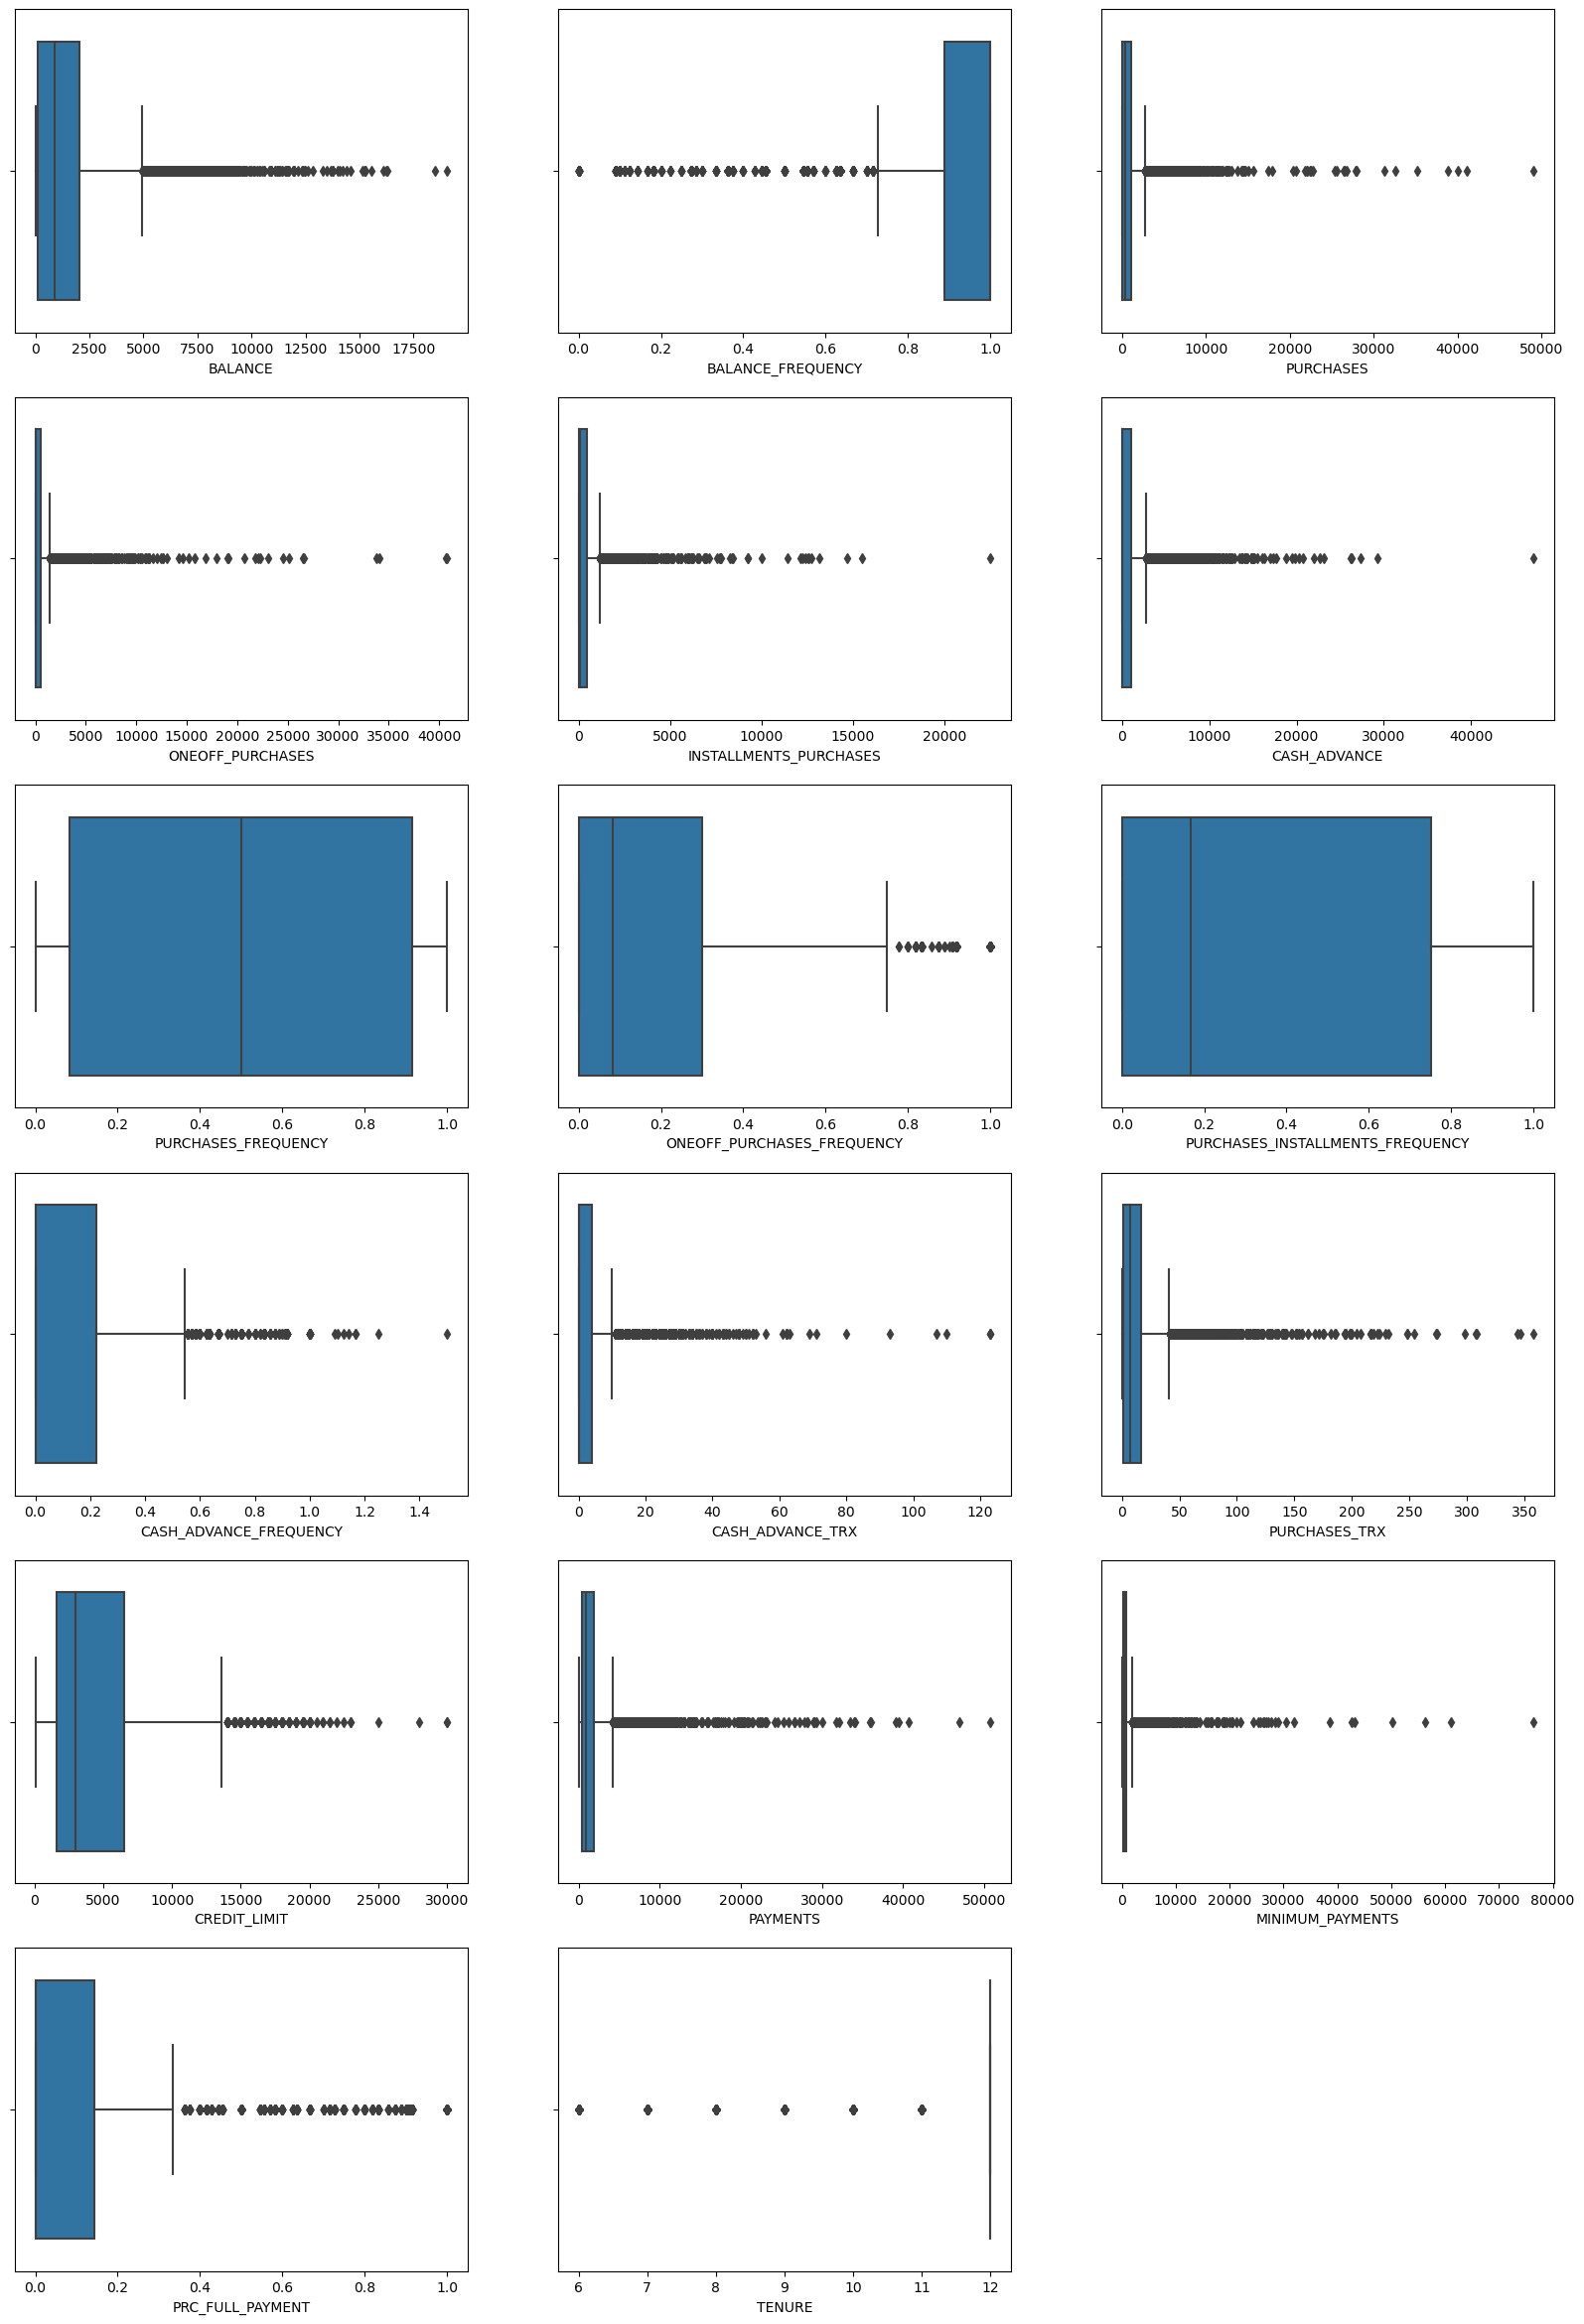

In [17]:
# visualisasi numerical features
plt.figure(figsize=(20, 60), facecolor='white')
num = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12, 3, num)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    num += 1
plt.show()

In [18]:
def count_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers[column].count()

In [19]:
count_outliers_iqr(df, ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

BALANCE                        695
BALANCE_FREQUENCY             1493
PURCHASES                      808
ONEOFF_PURCHASES              1013
INSTALLMENTS_PURCHASES         867
CASH_ADVANCE                  1030
ONEOFF_PURCHASES_FREQUENCY     782
CASH_ADVANCE_FREQUENCY         525
CASH_ADVANCE_TRX               804
PURCHASES_TRX                  766
CREDIT_LIMIT                   248
PAYMENTS                       808
MINIMUM_PAYMENTS               774
PRC_FULL_PAYMENT              1474
dtype: int64

Dapat diketahui bahwa terdapat banyak outliers pada beberapa atribut di dataset CC General

**Handling Data Outliers**

In [20]:
# Mengisi outliers dengan mean
def fill_outliers_with_mean(df, column):
    fill_value = df[column].mean()

    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = fill_value

In [21]:
fill_outliers_with_mean(df, 'BALANCE')
fill_outliers_with_mean(df, 'BALANCE_FREQUENCY')
fill_outliers_with_mean(df, 'PURCHASES')
fill_outliers_with_mean(df, 'ONEOFF_PURCHASES')
fill_outliers_with_mean(df, 'INSTALLMENTS_PURCHASES')
fill_outliers_with_mean(df, 'CASH_ADVANCE')
fill_outliers_with_mean(df, 'ONEOFF_PURCHASES_FREQUENCY')
fill_outliers_with_mean(df, 'CASH_ADVANCE_FREQUENCY')
fill_outliers_with_mean(df, 'CASH_ADVANCE_TRX')
fill_outliers_with_mean(df, 'PURCHASES_TRX')
fill_outliers_with_mean(df, 'CREDIT_LIMIT')
fill_outliers_with_mean(df, 'PAYMENTS')
fill_outliers_with_mean(df, 'MINIMUM_PAYMENTS')
fill_outliers_with_mean(df, 'PRC_FULL_PAYMENT')

In [22]:
count_outliers_iqr(df, ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

BALANCE                       417
BALANCE_FREQUENCY               0
PURCHASES                     146
ONEOFF_PURCHASES                0
INSTALLMENTS_PURCHASES        179
CASH_ADVANCE                  178
ONEOFF_PURCHASES_FREQUENCY    561
CASH_ADVANCE_FREQUENCY        275
CASH_ADVANCE_TRX              261
PURCHASES_TRX                 193
CREDIT_LIMIT                   81
PAYMENTS                      160
MINIMUM_PAYMENTS                0
PRC_FULL_PAYMENT                0
dtype: int64

In [23]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.000000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.000000,0.00,978.871112,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.170000,0.00,0.000000,1.000000,0.202458,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.877271,1499.00,592.437371,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.000000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.000000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.153715,6
8946,19.183215,1.000000,300.00,0.000000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.000000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.000000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6


## Frekuensi TENURE

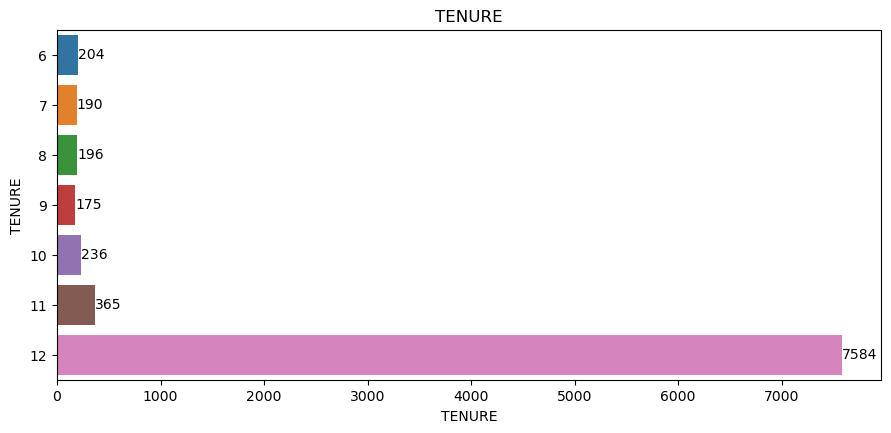

In [24]:
plt.figure(figsize=(100, 10), facecolor="white")

ax = plt.subplot(2, 8, 15)
sns.countplot(y='TENURE', data=df)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('TENURE')
plt.title('TENURE')

plt.show()

Dapat diketahui bahwa TENURE terbanyak adalah 12 artinya banyak orang yang memilih cicilan selama 12 bulan

## Frekuensi PURCHASES_TRX

0.000000     2044
14.709832     766
1.000000      667
12.000000     570
2.000000      379
6.000000      352
3.000000      314
4.000000      285
7.000000      275
8.000000      267
5.000000      267
9.000000      248
11.000000     223
10.000000     215
13.000000     166
14.000000     163
24.000000     115
16.000000     113
15.000000     107
17.000000     105
20.000000      99
21.000000      92
19.000000      91
22.000000      84
18.000000      84
27.000000      74
25.000000      73
26.000000      73
23.000000      68
29.000000      54
28.000000      54
31.000000      50
33.000000      50
30.000000      45
35.000000      44
32.000000      42
39.000000      40
34.000000      39
36.000000      38
40.000000      30
37.000000      30
41.000000      29
38.000000      26
Name: PURCHASES_TRX, dtype: int64


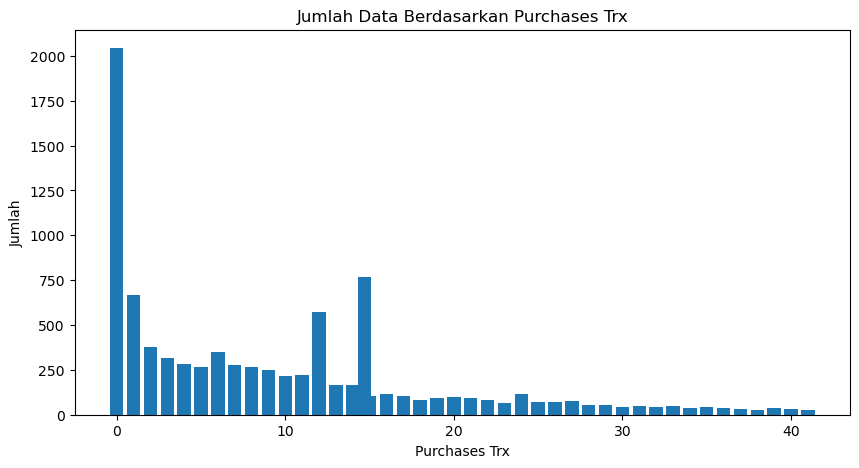

In [25]:
frek_PT = df['PURCHASES_TRX'].value_counts()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(frek_PT.index, frek_PT.values)
ax.set_xlabel('Purchases Trx')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Data Berdasarkan Purchases Trx')
print(frek_PT)
plt.show()

Dapat diketahui dari grafik diatas bahwa jumlah data berdasarkan Purchases TRX dominan dari 0 sampai 15

# Data Pre-processing

## Korelasi Data

<AxesSubplot:>

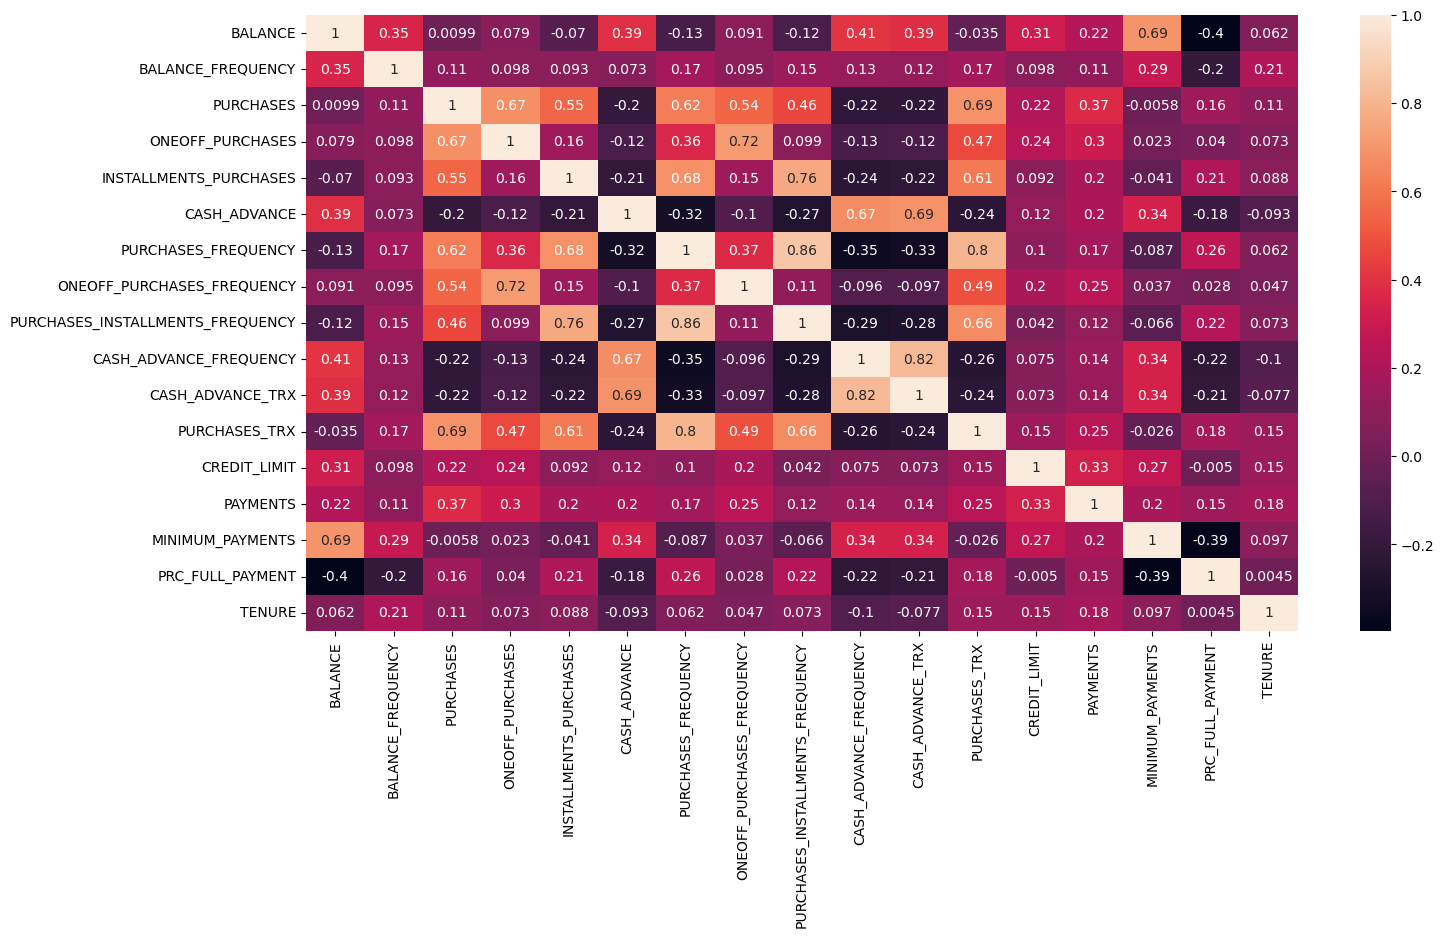

In [26]:
# Cek korelasi
corr_mat = df.corr()
fig = plt.figure(figsize=(16, 8))
sns.heatmap(corr_mat, annot=True)

## Scaling Data

In [27]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled, columns=df.columns)
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.947300,-2.004544,-0.767822,-0.730390,-0.451509,-0.691786,-0.806490,-0.730029,-0.707313,-0.747737,-0.715352,-0.768931,-1.058244,-0.996334,-0.866047,-0.650543,0.360680
1,1.807289,-0.696066,-0.918193,-0.730390,-0.792088,0.765544,-1.221758,-0.730029,-0.916995,1.095792,0.895207,-0.977491,0.951038,3.207710,1.351805,2.040546,0.360680
2,1.191021,0.612413,0.300488,1.458178,-0.792088,-0.691786,1.269843,0.349337,-0.916995,-0.747737,-0.715352,0.273869,1.118478,-0.543449,0.293663,-0.650543,0.360680
3,0.469190,-1.154064,1.444551,0.946589,-0.792088,-0.385411,-1.014125,-0.285754,-0.916995,-0.133230,-0.312712,-0.873211,1.118478,-1.213800,0.856957,-0.650543,0.360680
4,-0.270483,0.612413,-0.892973,-0.685100,-0.792088,-0.691786,-1.014125,-0.285754,-0.916995,-0.747737,-0.715352,-0.873211,-0.991268,-0.482813,-0.615735,-0.650543,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.958110,0.612413,-0.459326,-0.730390,0.247213,-0.691786,1.269843,-0.730029,1.179833,-0.747737,-0.715352,-0.351811,-1.058244,-0.862933,-1.081509,1.210928,-4.122768
8946,-0.966222,0.612413,-0.445329,-0.730390,0.278914,-0.691786,1.269843,-0.730029,1.179833,-0.747737,-0.715352,-0.351811,-1.058244,-0.916527,0.856957,-0.650543,-4.122768
8947,-0.962549,-1.786472,-0.690588,-0.730390,-0.276579,-0.691786,0.854576,-0.730029,0.760469,-0.747737,-0.715352,-0.456091,-1.058244,-1.126221,-1.001785,2.376935,-4.122768
8948,-0.971210,-1.786472,-0.918193,-0.730390,-0.792088,-0.637357,-1.221758,-0.730029,-0.916995,0.481285,0.089928,-0.977491,-1.225684,-1.157171,-1.065177,2.376935,-4.122768


In [28]:
df_scaled.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-9.808169e-16,8.839980e-15,-9.819209e-16,-3.168167e-16,-5.204775e-16,-6.521909e-16,-3.716084e-16,-3.606104e-15,2.353921e-16,6.605517e-16,3.464640e-17,6.313013e-16,-1.256177e-15,-1.650747e-15,-1.743038e-15,3.318091e-15,1.556446e-14
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-9.829355e-01,-3.313023e+00,-9.181928e-01,-7.303901e-01,-7.920883e-01,-6.917855e-01,-1.221758e+00,-7.300289e-01,-9.169952e-01,-7.477371e-01,-7.153517e-01,-9.774907e-01,-1.376380e+00,-1.213800e+00,-1.197693e+00,-6.505434e-01,-4.122768e+00
25%,-8.711669e-01,-9.868386e-01,-8.557196e-01,-7.303901e-01,-7.920883e-01,-6.917855e-01,-1.014125e+00,-7.300289e-01,-9.169952e-01,-7.477371e-01,-7.153517e-01,-8.732107e-01,-8.573157e-01,-8.007742e-01,-7.915158e-01,-6.505434e-01,3.606795e-01
50%,-2.219783e-01,6.124132e-01,-3.487385e-01,-6.228257e-01,-4.743575e-01,-6.917855e-01,2.404259e-02,-2.857542e-01,-4.976286e-01,-7.477371e-01,-7.153517e-01,-2.475308e-01,-3.884834e-01,-2.903860e-01,-3.997652e-01,-6.505434e-01,3.606795e-01
75%,3.801495e-01,6.124132e-01,6.630719e-01,9.040373e-01,6.754270e-01,7.655440e-01,1.062211e+00,3.493374e-01,9.701506e-01,4.812848e-01,5.927551e-01,5.564505e-01,6.161573e-01,6.538703e-01,8.569565e-01,1.079443e+00,3.606795e-01
max,3.321254e+00,6.124132e-01,3.356340e+00,3.355162e+00,3.386572e+00,3.453433e+00,1.269843e+00,3.268459e+00,1.599199e+00,3.274512e+00,3.311046e+00,3.297989e+00,3.161247e+00,3.287769e+00,3.319669e+00,3.386091e+00,3.606795e-01


# Pendefinisian Model

In [29]:
kmeans_2 = KMeans(n_clusters=2, init='k-means++')

kmeans_2.fit(scaled)

KMeans(n_clusters=2)

# Pelatihan Model

In [30]:
kmeans_2.inertia_

119589.36776844552

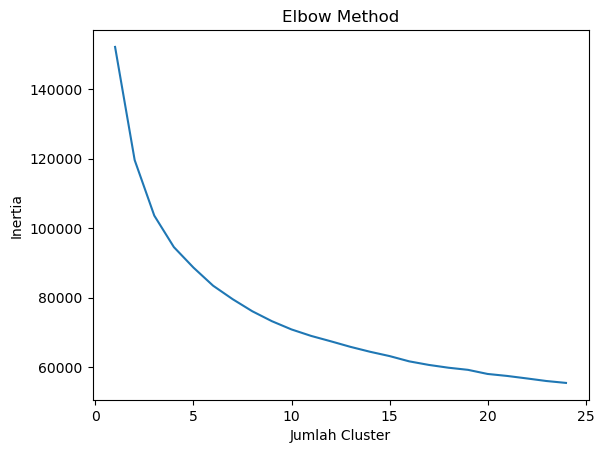

In [31]:
inertia = []
for k in range (1,25):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,25), inertia)
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.show()

In [32]:
kmeans_6 = KMeans(n_clusters=6, init='k-means++')
kmeans_6.fit(scaled)
labels=kmeans_6.labels_
pred = kmeans_6.predict(scaled)

pred

array([3, 5, 1, ..., 4, 4, 4])

In [33]:
df_clusters = df.copy()
df_clusters['CLUSTERS'] = pred

In [34]:
df_clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.000000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.000000,0.00,978.871112,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.170000,0.00,0.000000,1.000000,0.202458,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.877271,1499.00,592.437371,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.000000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.000000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.153715,6,4
8946,19.183215,1.000000,300.00,0.000000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,864.206542,0.000000,6,4
8947,23.398673,0.833333,144.40,0.000000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6,4
8948,13.457564,0.833333,0.00,0.000000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6,4


In [35]:
df_clusters.CLUSTERS.value_counts()

3    2195
5    1875
2    1673
1    1550
0    1063
4     594
Name: CLUSTERS, dtype: int64

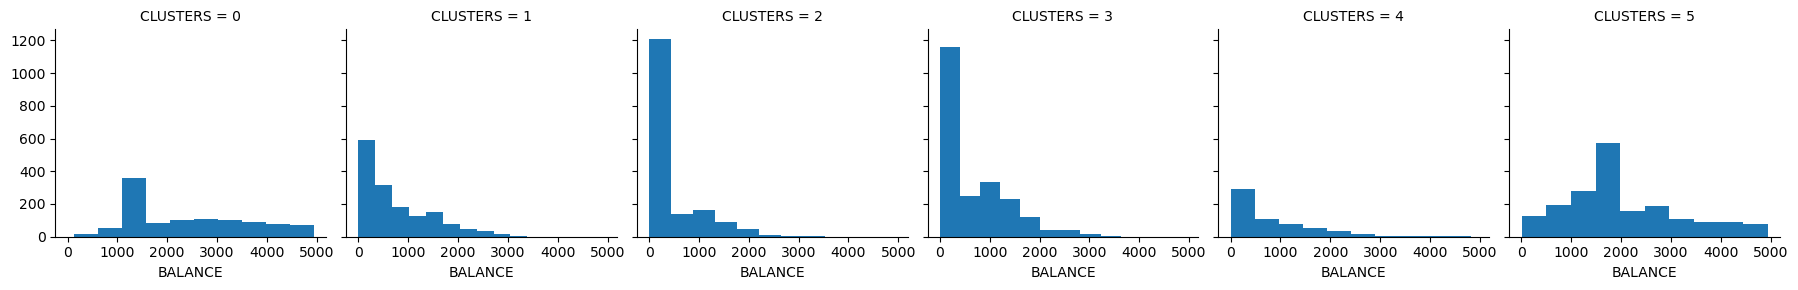

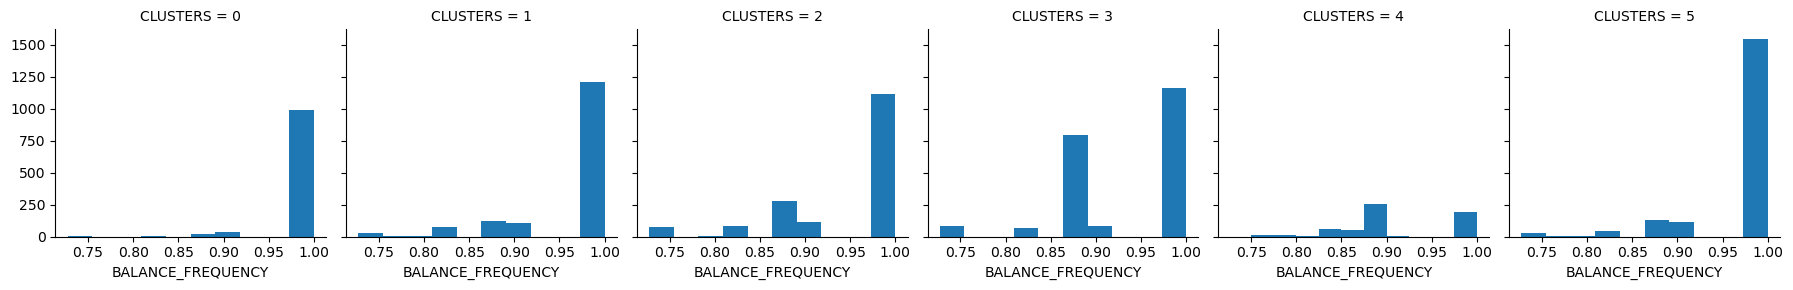

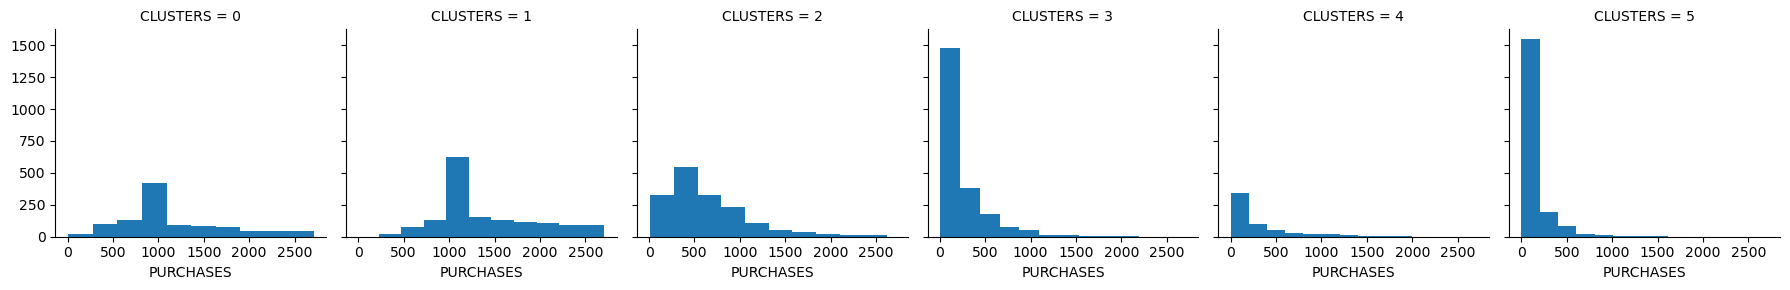

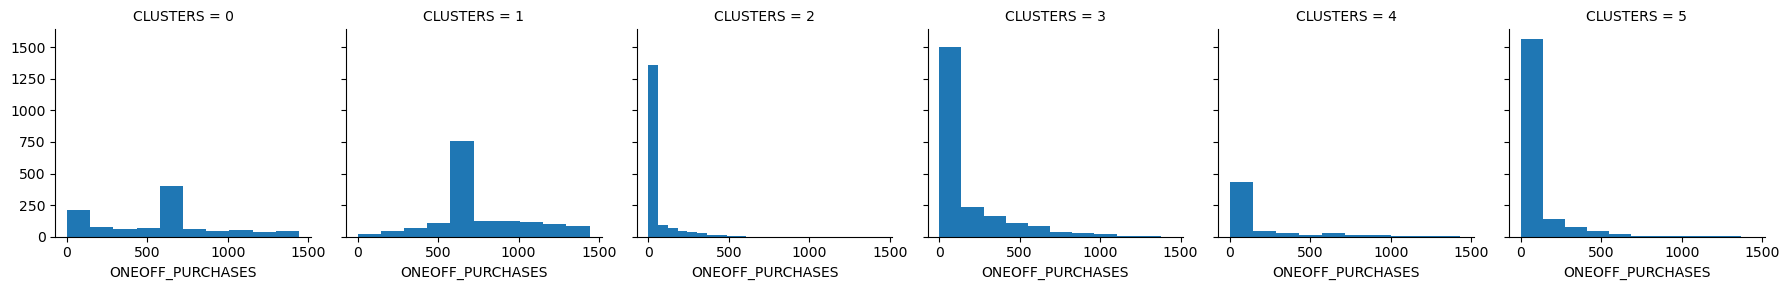

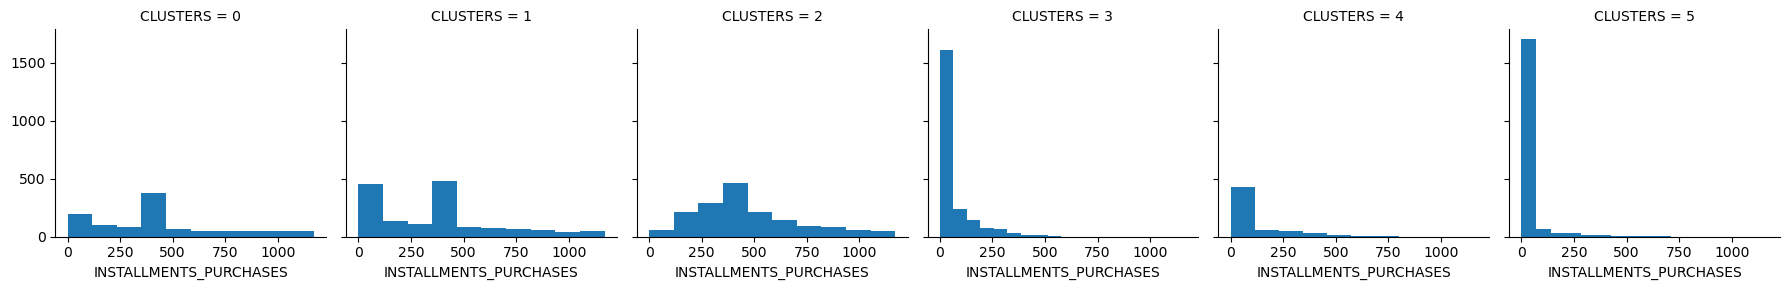

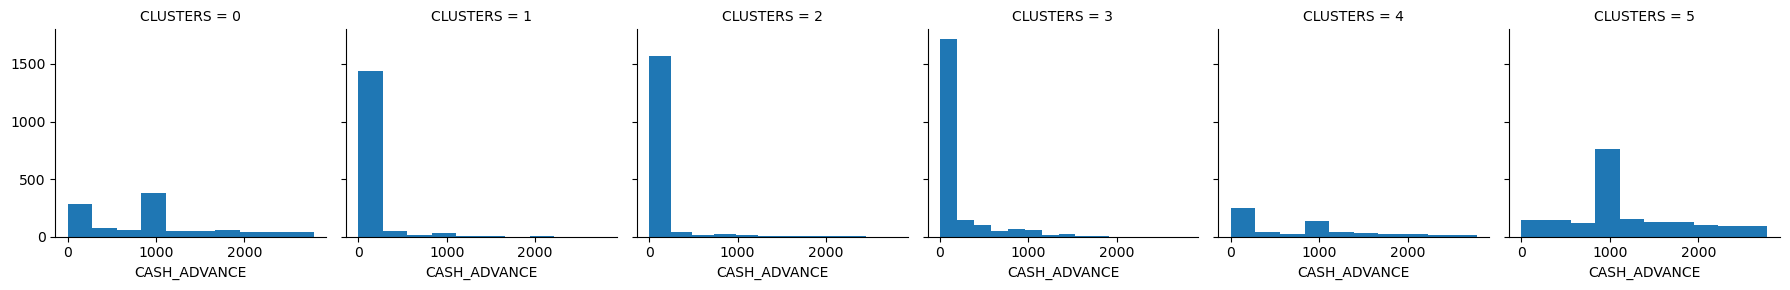

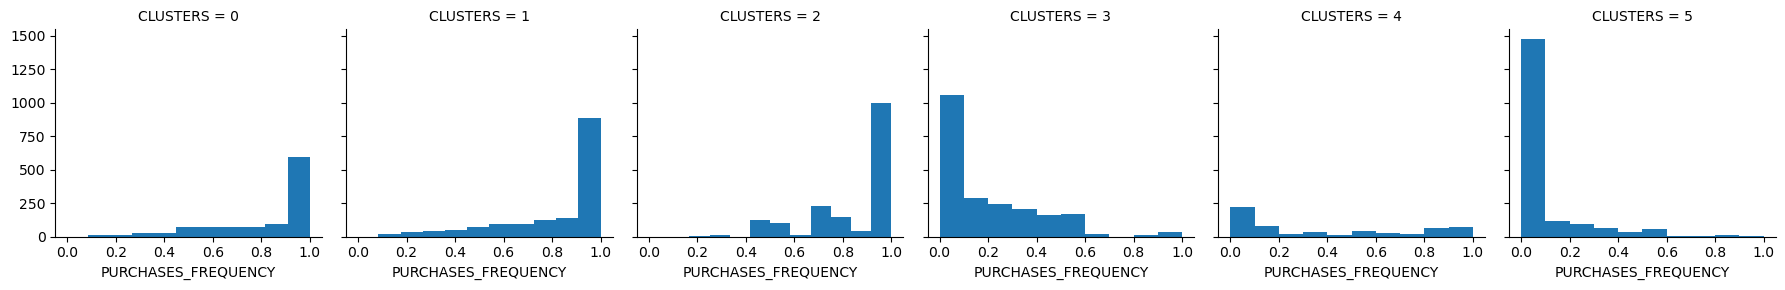

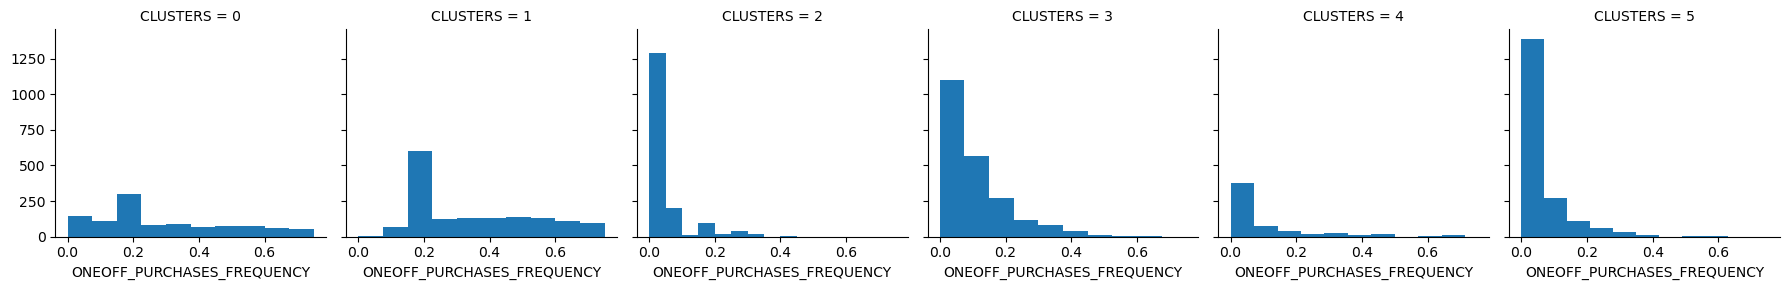

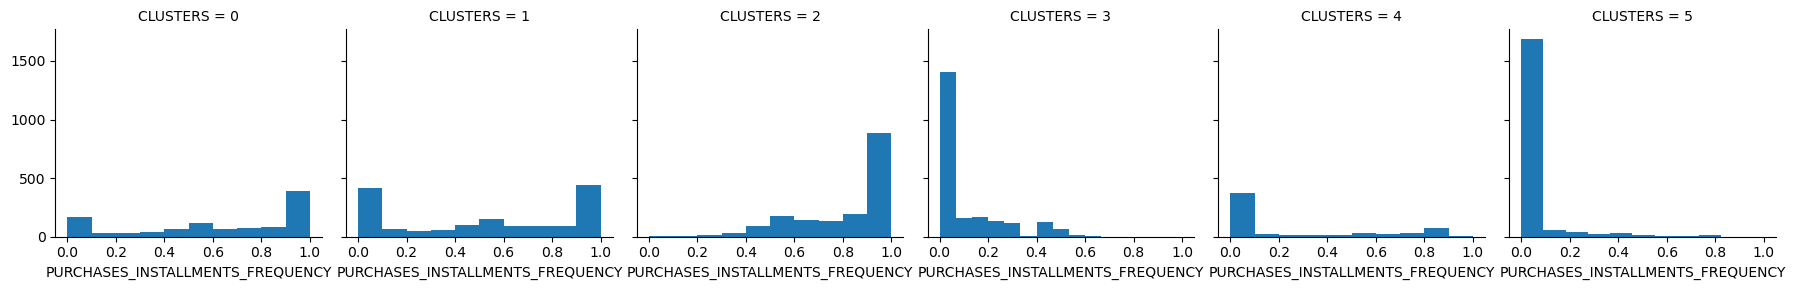

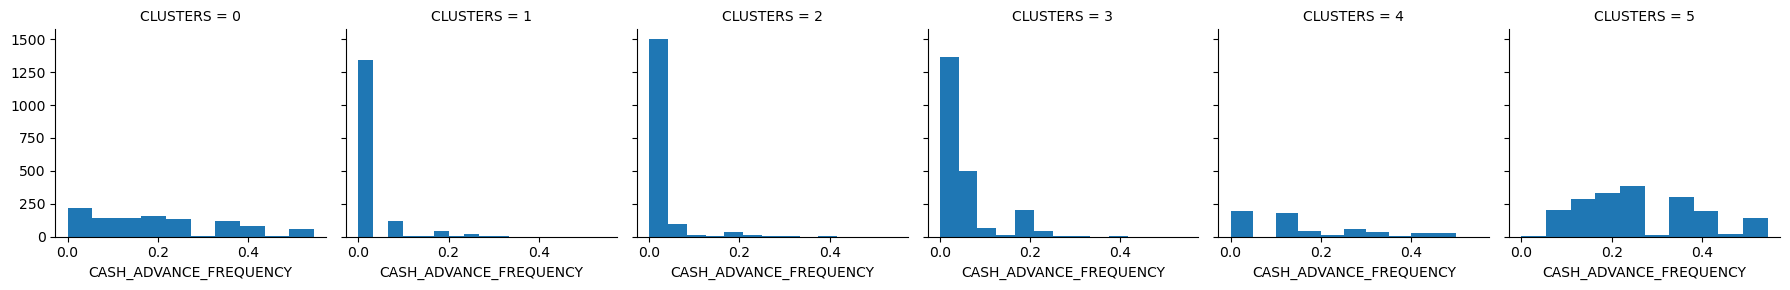

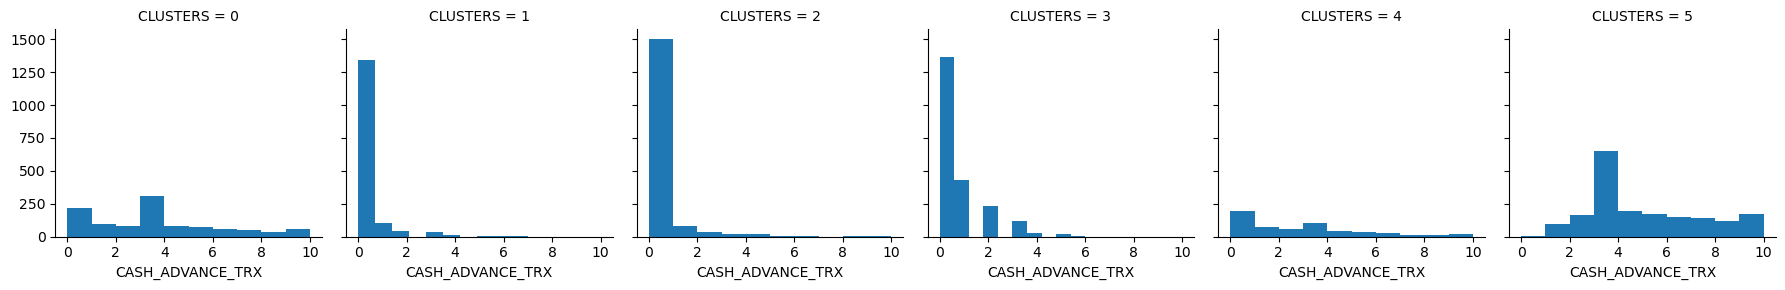

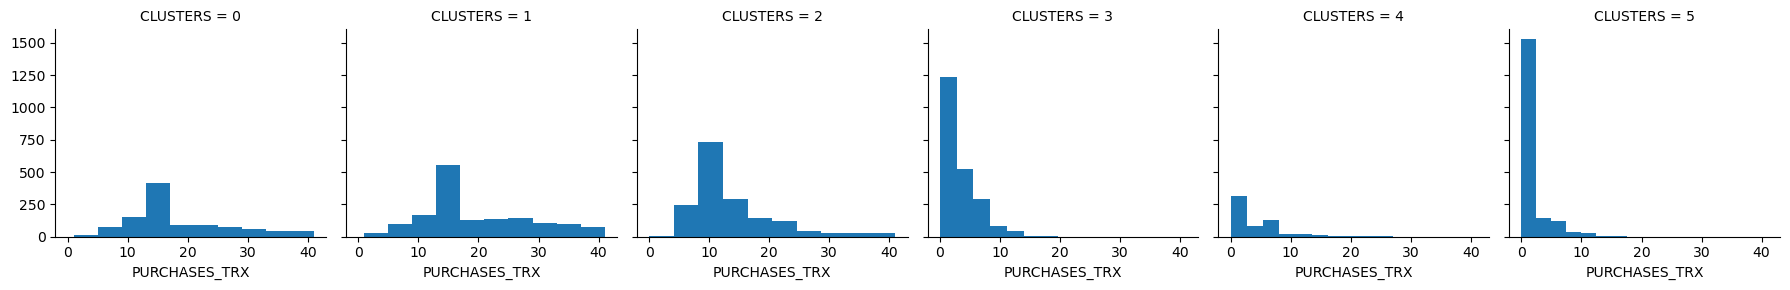

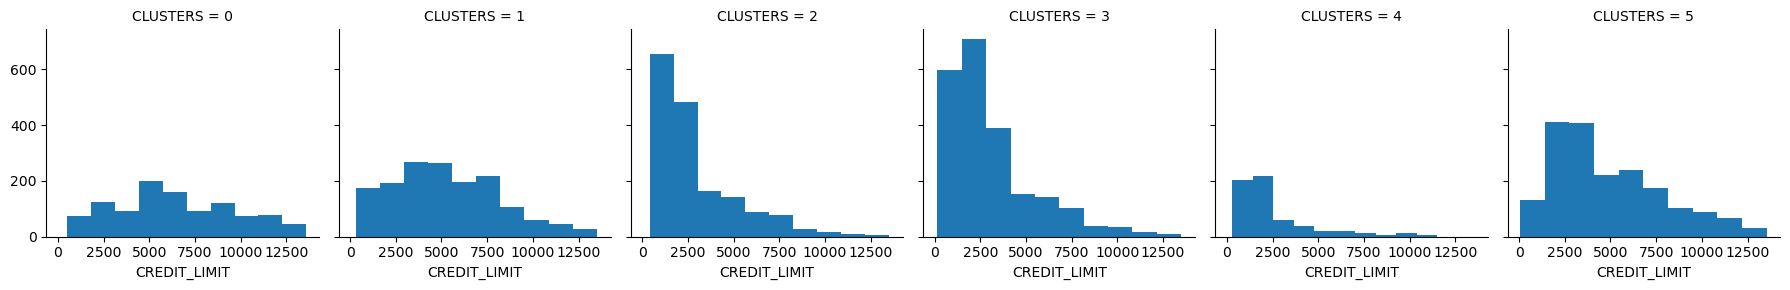

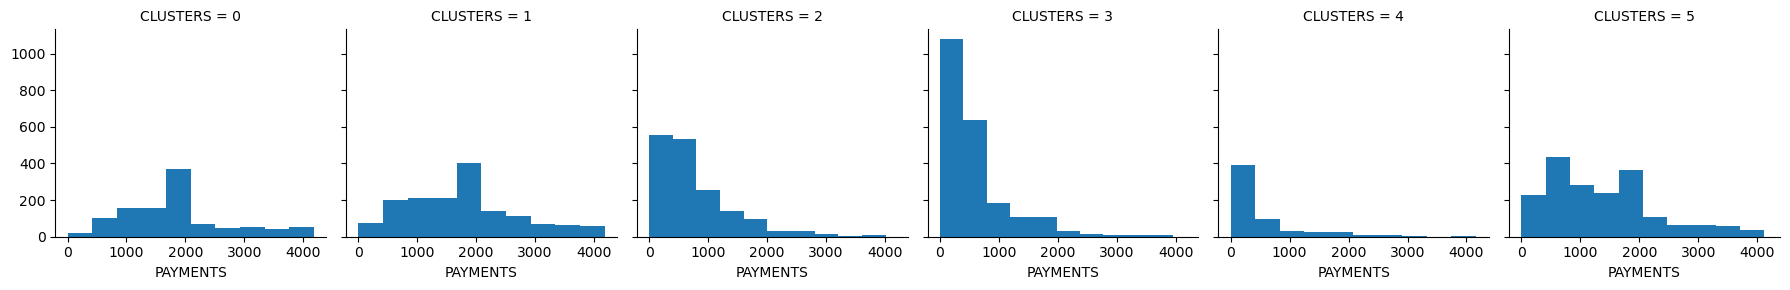

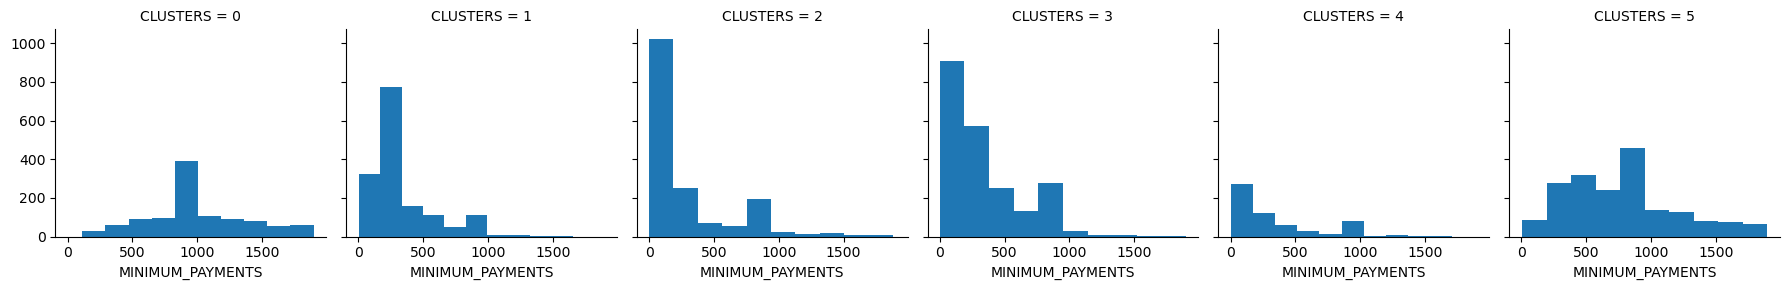

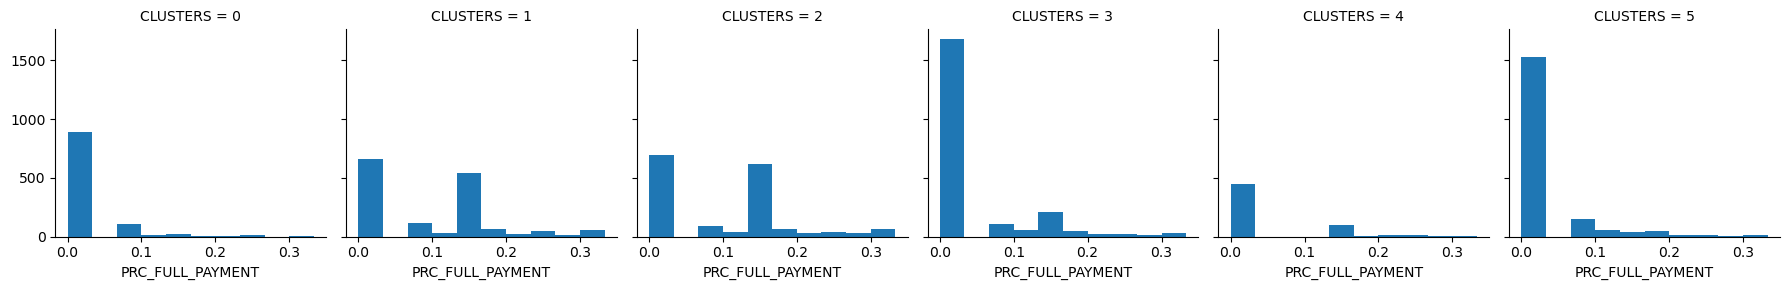

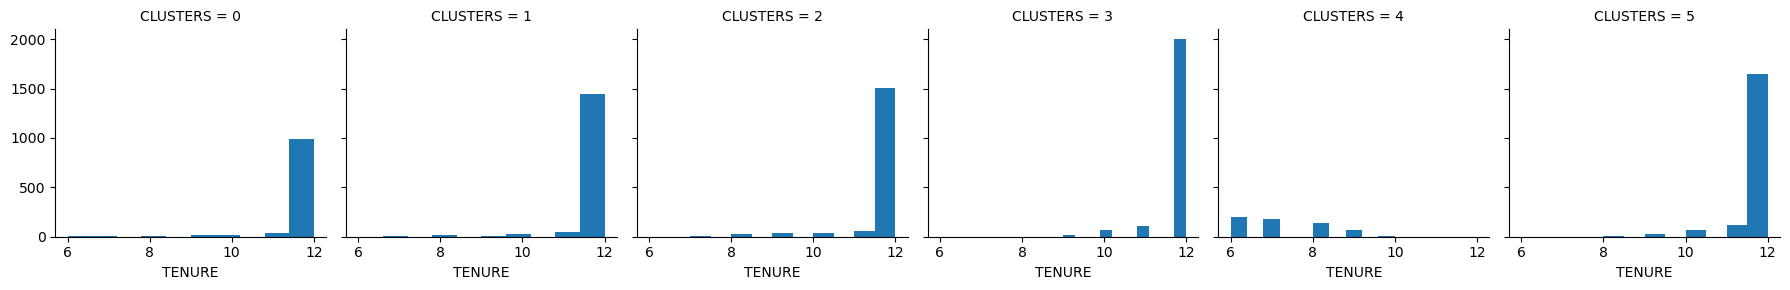

In [36]:
for c in df_scaled:
    grid= sns.FacetGrid(df_clusters, col='CLUSTERS')
    grid.map(plt.hist, c)

# Save Plot
plt.savefig("kmeans_clust.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

## Pola Clustering

In [37]:
def evaluasi_N(data, max_clusters):
    # Inisialisasi variabel untuk menyimpan hasil evaluasi
    elbow_scores = []
    silhouette_scores = []

    # Melakukan clustering dengan jumlah kluster mulai dari 2 hingga max_clusters
    for num_clusters in range(2, max_clusters + 1):
        # Membuat objek KMeans dan melakukan clustering
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        kmeans.fit(data)

        # Evaluasi dengan elbow method
        elbow_scores.append(kmeans.inertia_)

        # Evaluasi dengan nilai silhouette
        silhouette_avg = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

    # Menampilkan elbow method plot
    plt.plot(range(2, max_clusters + 1), elbow_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS (Elbow Score)')
    plt.title('Elbow Method')
    plt.show()

    # Menampilkan silhouette scores
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores')
    plt.show()

    # Menentukan jumlah kluster berdasarkan nilai silhouette tertinggi
    optimal_clusters = np.argmax(silhouette_scores) + 2
    result = print(f'Optimal number of clusters: {optimal_clusters}')   
    return(result)

In [38]:
df_scaled_pola_1 = df_scaled[['BALANCE', 'PURCHASES']]
df_scaled_pola_2 = df_scaled[['BALANCE', 'PAYMENTS']]
df_scaled_pola_3 = df_scaled[['CREDIT_LIMIT', 'PAYMENTS']]

### Pola 1

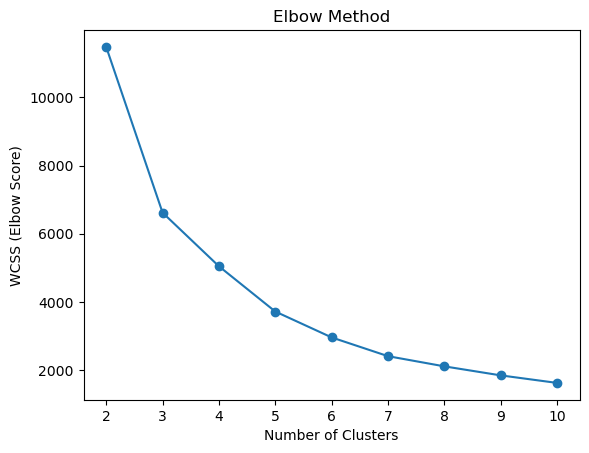

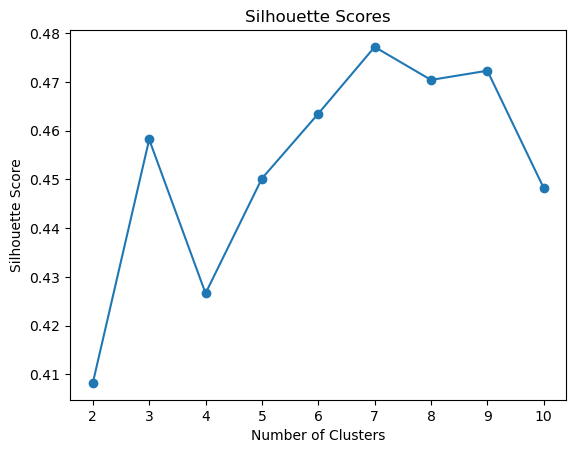

Optimal number of clusters: 7


In [39]:
evaluasi_N(df_scaled_pola_1, 10)

In [40]:
Kmeans_pola_1 = KMeans(n_clusters=7, init='k-means++')
Kmeans_pola_1.fit(df_scaled_pola_1)
pred_pola_1 = Kmeans_pola_1.predict(df_scaled_pola_1)

In [41]:
df_clusters_pola_1 = df.copy()
df_clusters_pola_1['CLUSTERS'] = pred_pola_1

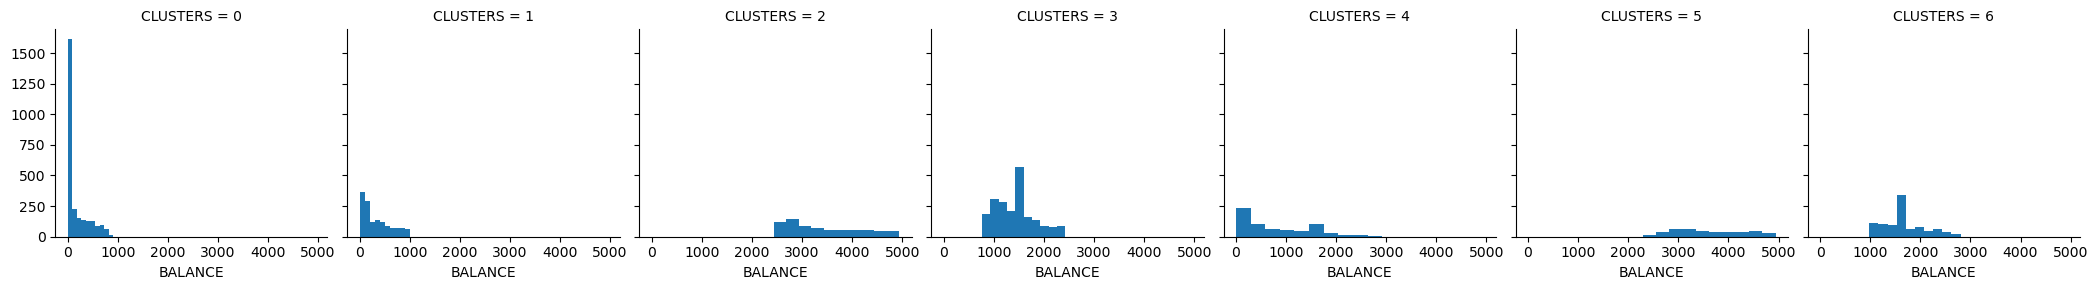

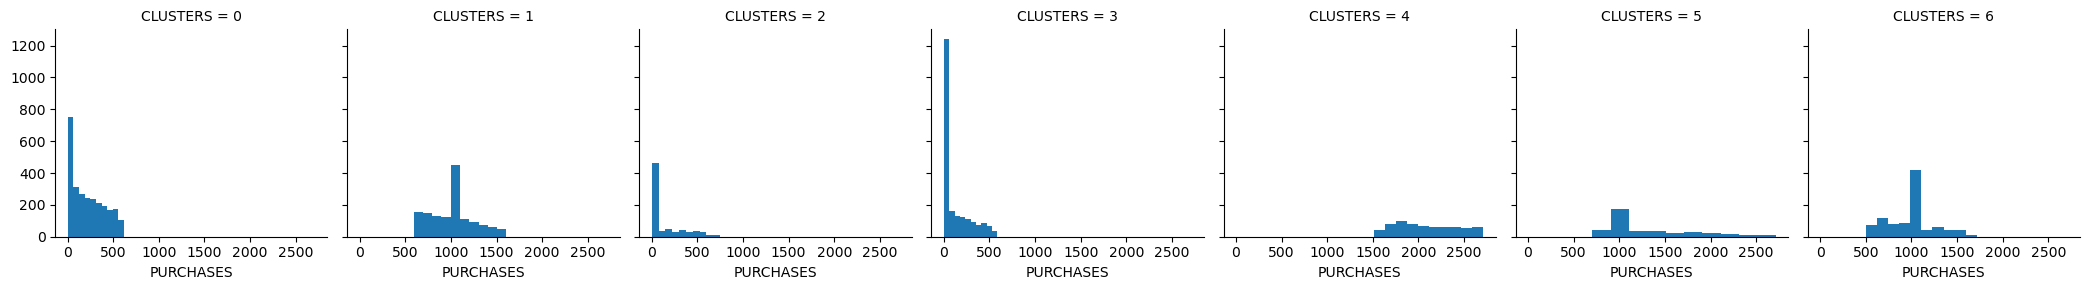

In [42]:
for c in df_scaled_pola_1:
    grid= sns.FacetGrid(df_clusters_pola_1, col='CLUSTERS')
    grid.map(plt.hist, c)

# save plot
plt.savefig("kmeans_clust.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [43]:
def filter_clusters(df, n):
    filtered_data = df[['BALANCE', 'PURCHASES', 'CLUSTERS']].loc[df['CLUSTERS'] == n]
    return filtered_data

**Cluster 0**

In [44]:
filter_clusters(df_clusters_pola_1, 0).head()

,BALANCE,PURCHASES,CLUSTERS
0,40.900749,95.40,0
17,41.089489,519.00,0
25,169.781679,399.60,0
27,125.694817,233.28,0
29,22.063490,100.00,0


In [45]:
filter_clusters(df_clusters_pola_1, 0).describe()

,BALANCE,PURCHASES,CLUSTERS
count,2658.000000,2658.000000,2658.0
mean,170.233939,217.192182,0.0
std,222.767157,183.876748,0.0
min,0.000000,0.000000,0.0
25%,16.633474,47.952500,0.0
50%,50.535291,186.095000,0.0
75%,272.611142,363.662500,0.0
max,914.222213,619.590000,0.0


Dapat diketahui bahwa pada pola 1 cluster 0 : 
1. Nilai rata-rata balance sebesar 170.23 sedangkan nilai rata-rata purchases sebesar 217.19
2. Nilai minimum balance dan purchases sebesar 0
3. Nilai maksimum balance sebesar 914.22 sedangkan nilai maksimum purchases sebesar 619.59

**Cluster 1**

In [46]:
filter_clusters(df_clusters_pola_1, 1).head()

,BALANCE,PURCHASES,CLUSTERS
6,627.260806,1003.204834,1
9,152.225975,1281.600000,1
11,630.794744,1492.180000,1
22,132.342240,815.900000,1
33,125.660453,636.790000,1


In [47]:
filter_clusters(df_clusters_pola_1, 1).describe()

,BALANCE,PURCHASES,CLUSTERS
count,1402.000000,1402.000000,1402.0
mean,333.766336,1005.676006,1.0
std,278.687451,236.992143,0.0
min,0.000000,590.000000,1.0
25%,98.322941,824.357500,1.0
50%,234.828657,1003.204834,1.0
75%,528.104241,1134.605000,1.0
max,1008.864224,1607.840000,1.0


Dapat diketahui bahwa pada pola 1 cluster 1 :
1. Nilai rata-rata balance sebesar 333.76 sedangkan nilai rata-rata purchases sebesar 1005.67
2. Nilai minimum balance sebesar 0 sedangkan purchases sebesar 590
3. Nilai maksimum balance sebesar 1008.86 sedangkan nilai maksimum purchases sebesar 1607.84

**Cluster 2**

In [48]:
filter_clusters(df_clusters_pola_1, 2).head()

,BALANCE,PURCHASES,CLUSTERS
1,3202.467416,0.00,2
14,2772.772734,0.00,2
19,3577.970933,398.64,2
34,3517.101616,547.28,2
42,4104.710798,203.82,2


In [49]:
filter_clusters(df_clusters_pola_1, 2).describe()

,BALANCE,PURCHASES,CLUSTERS
count,732.000000,732.000000,732.0
mean,3407.679446,130.118921,2.0
std,728.441473,194.706973,0.0
min,2431.193194,0.000000,2.0
25%,2764.241734,0.000000,2.0
50%,3214.829793,0.000000,2.0
75%,4016.146317,229.062500,2.0
max,4939.646030,749.000000,2.0


Dapat diketahui bahwa pada pola 1 cluster 2 :
1. Nilai rata-rata balance sebesar 3407.67 sedangkan nilai rata-rata purchases sebesar 130.11
2. Nilai minimum balance sebesar 2431.19 sedangkan purchases sebesar 0
3. Nilai maksimum balance sebesar 4939.64 sedangkan nilai maksimum purchases sebesar 749

**Cluster 3**

In [50]:
filter_clusters(df_clusters_pola_1, 3).head()

,BALANCE,PURCHASES,CLUSTERS
4,817.714335,16.00,3
7,1823.652743,436.20,3
16,2072.074354,0.00,3
18,1989.072228,504.35,3
20,2016.684686,176.68,3


In [51]:
filter_clusters(df_clusters_pola_1, 3).describe()

,BALANCE,PURCHASES,CLUSTERS
count,2114.000000,2114.000000,2114.0
mean,1442.895170,112.390128,3.0
std,391.393193,158.866209,0.0
min,763.228081,0.000000,3.0
25%,1109.855277,0.000000,3.0
50%,1474.217597,0.000000,3.0
75%,1618.243515,202.282500,3.0
max,2427.756294,585.840000,3.0


Dapat diketahui bahwa pada pola 1 cluster 3 :
1. Nilai rata-rata balance sebesar 1442.89 sedangkan nilai rata-rata purchases sebesar 112.39
2. Nilai minimum balance sebesar 763.22 sedangkan purchases sebesar 0
3. Nilai maksimum balance sebesar 2427.75 sedangkan nilai maksimum purchases sebesar 585.84

**Cluster 4**

In [52]:
filter_clusters(df_clusters_pola_1, 4).head()

,BALANCE,PURCHASES,CLUSTERS
13,921.693369,2137.93,4
15,1564.474828,1611.70,4
41,784.889762,1526.59,4
48,229.867179,2390.60,4
53,464.674156,1979.22,4


In [53]:
filter_clusters(df_clusters_pola_1, 4).describe()

,BALANCE,PURCHASES,CLUSTERS
count,665.000000,665.000000,665.0
mean,831.435017,2089.245383,4.0
std,684.678825,325.401556,0.0
min,0.000000,1517.560000,4.0
25%,228.909884,1813.870000,4.0
50%,568.060722,2071.550000,4.0
75%,1495.080484,2358.280000,4.0
max,2920.392514,2707.460000,4.0


Dapat diketahui bahwa pada pola 1 cluster 4 :
1. Nilai rata-rata balance sebesar 831.43 sedangkan nilai rata-rata purchases sebesar 2089.24
2. Nilai minimum balance sebesar 0 sedangkan purchases sebesar 1517.56
3. Nilai maksimum balance sebesar 2920.39 sedangkan nilai maksimum purchases sebesar 2707.46

**Cluster 5**

In [54]:
filter_clusters(df_clusters_pola_1, 5).head()

,BALANCE,PURCHASES,CLUSTERS
23,3800.151377,1003.204834,5
37,4047.480828,2380.550000,5
50,4931.331857,901.420000,5
71,2990.422186,1003.204834,5
102,3539.801912,1003.204834,5


In [55]:
filter_clusters(df_clusters_pola_1, 5).describe()

,BALANCE,PURCHASES,CLUSTERS
count,408.000000,408.000000,408.0
mean,3610.592881,1340.443770,5.0
std,670.658818,494.640255,0.0
min,2288.014844,703.230000,5.0
25%,3051.986410,1003.204834,5.0
50%,3518.725968,1039.485000,5.0
75%,4184.421202,1676.450000,5.0
max,4940.113918,2711.900000,5.0


Dapat diketahui bahwa pada pola 1 cluster 5 :
1. Nilai rata-rata balance sebesar 3610.59 sedangkan nilai rata-rata purchases sebesar 1340.443
2. Nilai minimum balance sebesar 2288.01 sedangkan purchases sebesar 703.23
3. Nilai maksimum balance sebesar 4940.11 sedangkan nilai maksimum purchases sebesar 2711.90

**Cluster 6**

In [56]:
filter_clusters(df_clusters_pola_1, 6).head()

,BALANCE,PURCHASES,CLUSTERS
2,2495.148862,773.17,6
3,1666.670542,1499.00,6
5,1809.828751,1333.28,6
8,1014.926473,861.49,6
10,1293.124939,920.12,6


In [57]:
filter_clusters(df_clusters_pola_1, 6).describe()

,BALANCE,PURCHASES,CLUSTERS
count,971.000000,971.000000,971.0
mean,1653.842186,985.898484,6.0
std,412.994417,244.612456,0.0
min,980.370868,502.630000,6.0
25%,1389.591112,825.365000,6.0
50%,1564.474828,1003.204834,6.0
75%,1904.092086,1023.030000,6.0
max,2802.369018,1716.110000,6.0


Dapat diketahui bahwa pada pola 1 cluster 6 :
1. Nilai rata-rata balance sebesar 1653.84 sedangkan nilai rata-rata purchases sebesar 985.89
2. Nilai minimum balance sebesar 980.37 sedangkan purchases sebesar 502.63
3. Nilai maksimum balance sebesar 2802.36 sedangkan nilai maksimum purchases sebesar 1716.11

### Pola 2

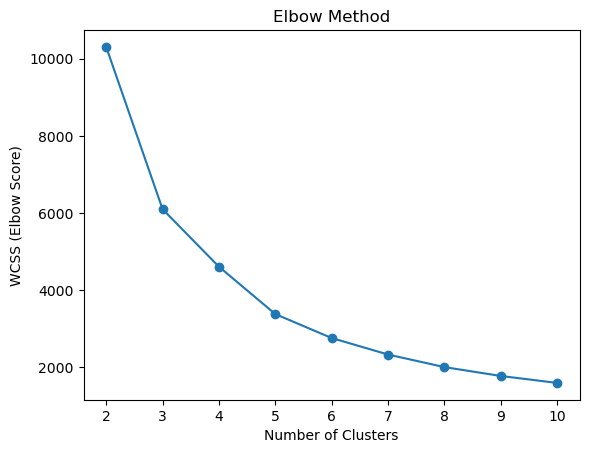

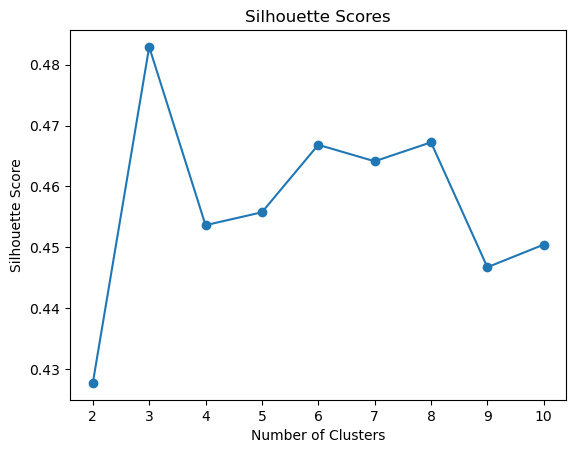

Optimal number of clusters: 3


In [58]:
evaluasi_N(df_scaled_pola_2, 10)

In [59]:
Kmeans_pola_2 = KMeans(n_clusters=3, init='k-means++')
Kmeans_pola_2.fit(df_scaled_pola_2)
pred_pola_2 = Kmeans_pola_2.predict(df_scaled_pola_2)

In [60]:
df_clusters_pola_2 = df.copy()
df_clusters_pola_2['CLUSTERS'] = pred_pola_2

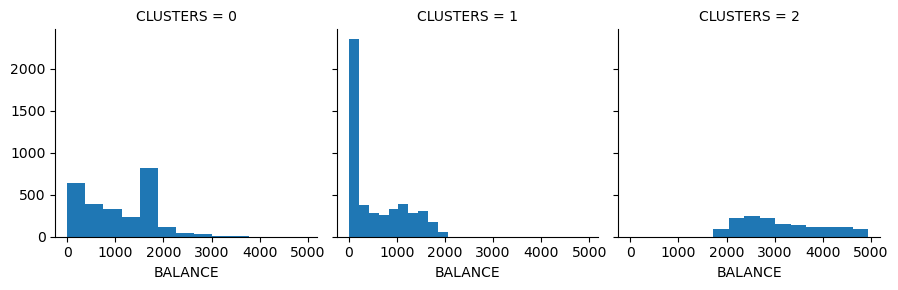

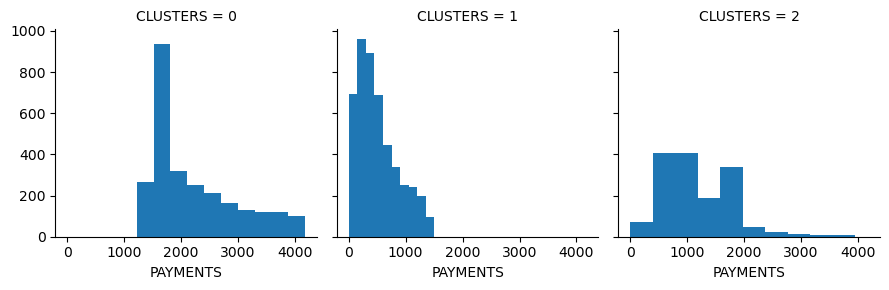

In [61]:
for c in df_scaled_pola_2:
    grid= sns.FacetGrid(df_clusters_pola_2, col='CLUSTERS')
    grid.map(plt.hist, c)

# save plot
plt.savefig("kmeans_clust.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**Cluster 0**

In [62]:
filter_clusters(df_clusters_pola_2, 0).head()

,BALANCE,PURCHASES,CLUSTERS
1,3202.467416,0.000000,0
5,1809.828751,1333.280000,0
6,627.260806,1003.204834,0
13,921.693369,2137.930000,0
15,1564.474828,1611.700000,0


In [63]:
filter_clusters(df_clusters_pola_2, 0).describe()

,BALANCE,PURCHASES,CLUSTERS
count,2628.000000,2628.000000,2628.0
mean,1043.447041,877.936838,0.0
std,683.976520,754.711734,0.0
min,0.000000,0.000000,0.0
25%,389.409578,102.762500,0.0
50%,1057.756092,1003.204834,0.0
75%,1564.474828,1212.802500,0.0
max,3767.546906,2707.460000,0.0


Dapat diketahui bahwa pada pola 2 cluster 0 :
1. Nilai rata-rata balance sebesar 1043.44 sedangkan nilai rata-rata purchases sebesar 877.93
2. Nilai minimum balance dan purchases sebesar 0
3. Nilai maksimum balance sebesar 3767.54 sedangkan nilai maksimum purchases sebesar 2707.46

**Cluster 1**

In [64]:
filter_clusters(df_clusters_pola_2, 1).head()

,BALANCE,PURCHASES,CLUSTERS
0,40.900749,95.40,1
3,1666.670542,1499.00,1
4,817.714335,16.00,1
7,1823.652743,436.20,1
8,1014.926473,861.49,1


In [65]:
filter_clusters(df_clusters_pola_2, 1).describe()

,BALANCE,PURCHASES,CLUSTERS
count,4810.000000,4810.000000,4810.0
mean,540.828126,421.047958,1.0
std,586.184428,469.247461,0.0
min,0.000000,0.000000,1.0
25%,40.470454,54.300000,1.0
50%,227.012372,269.310000,1.0
75%,1044.471341,620.380000,1.0
max,2069.451252,2660.210000,1.0


Dapat diketahui bahwa pada pola 2 cluster 1 :
1. Nilai rata-rata balance sebesar 540.82 sedangkan nilai rata-rata purchases sebesar 421.04
2. Nilai minimum balance dan purchases sebesar 0
3. Nilai maksimum balance sebesar 2069.45 sedangkan nilai maksimum purchases sebesar 2660.21

**Cluster 2**

In [66]:
filter_clusters(df_clusters_pola_2, 2).head()

,BALANCE,PURCHASES,CLUSTERS
2,2495.148862,773.170000,2
14,2772.772734,0.000000,2
16,2072.074354,0.000000,2
19,3577.970933,398.640000,2
23,3800.151377,1003.204834,2


In [67]:
filter_clusters(df_clusters_pola_2, 2).describe()

,BALANCE,PURCHASES,CLUSTERS
count,1512.000000,1512.000000,1512.0
mean,3143.828566,582.799165,2.0
std,848.310982,676.947271,0.0
min,1725.887609,0.000000,2.0
25%,2447.743469,0.000000,2.0
50%,2959.267370,324.240000,2.0
75%,3805.527610,1003.204834,2.0
max,4940.113918,2711.900000,2.0


Dapat diketahui bahwa pada pola 2 cluster 2 :
1. Nilai rata-rata balance sebesar 3143.82 sedangkan nilai rata-rata purchases sebesar 582.79
2. Nilai minimum balance sebesar 1725.88 sedangkan nilai minimum purchases sebesar 0
3. Nilai maksimum balance sebesar 4940.11 sedangkan nilai maksimum purchases sebesar 2711.90

### Pola 3

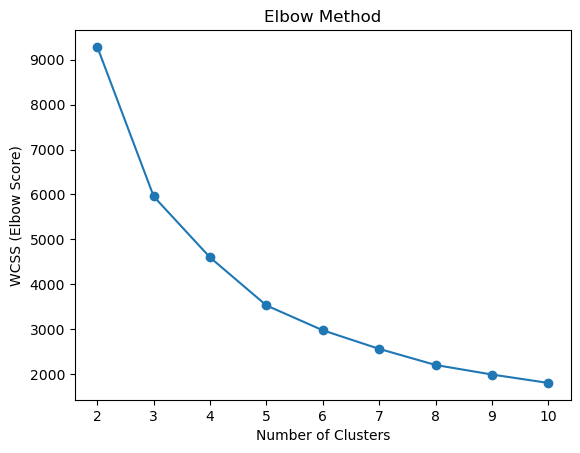

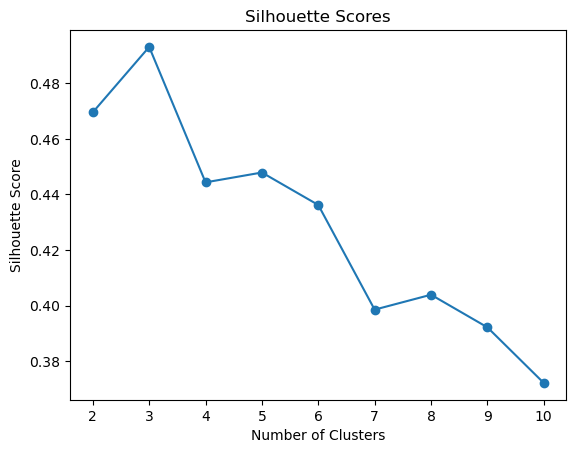

Optimal number of clusters: 3


In [68]:
evaluasi_N(df_scaled_pola_3, 10)

In [69]:
Kmeans_pola_3 = KMeans(n_clusters=3, init='k-means++')
Kmeans_pola_3.fit(df_scaled_pola_3)
pred_pola_3 = Kmeans_pola_3.predict(df_scaled_pola_3)


In [70]:
df_clusters_pola_3 = df.copy()
df_clusters_pola_3['CLUSTERS'] = pred_pola_3

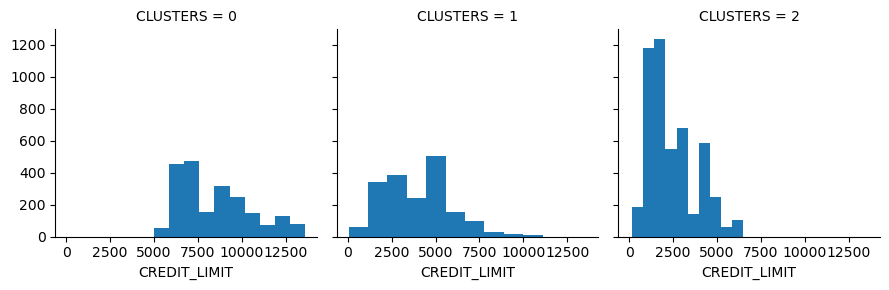

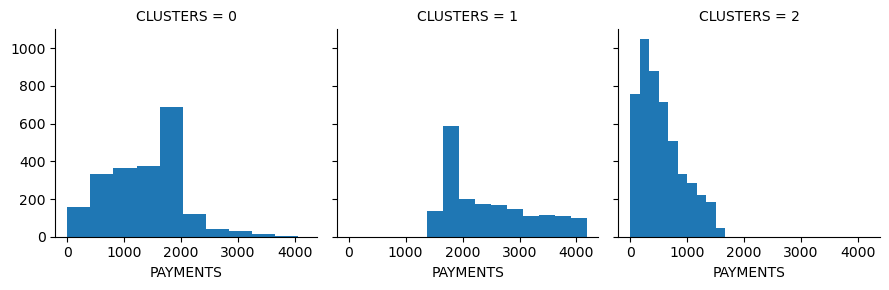

In [71]:
for c in df_scaled_pola_3:
    grid= sns.FacetGrid(df_clusters_pola_3, col='CLUSTERS')
    grid.map(plt.hist, c)

# save plot
plt.savefig("kmeans_clust.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**Cluster 0**

In [72]:
filter_clusters(df_clusters_pola_3, 0).head()

,BALANCE,PURCHASES,CLUSTERS
2,2495.148862,773.170000,0
3,1666.670542,1499.000000,0
6,627.260806,1003.204834,0
8,1014.926473,861.490000,0
9,152.225975,1281.600000,0


In [73]:
filter_clusters(df_clusters_pola_3, 0).describe()

,BALANCE,PURCHASES,CLUSTERS
count,2134.000000,2134.000000,2134.0
mean,1630.662023,742.424271,0.0
std,1352.979879,677.435088,0.0
min,0.000000,0.000000,0.0
25%,318.285191,85.655000,0.0
50%,1564.474828,678.485000,0.0
75%,2447.321252,1003.763708,0.0
max,4940.113918,2711.900000,0.0


Dapat diketahui bahwa pada pola 3 cluster 0 :
1. Nilai rata-rata balance sebesar 1630.66 sedangkan nilai rata-rata purchases sebesar 742.42
2. Nilai minimum balance dan nilai minimum purchases sebesar 0
3. Nilai maksimum balance sebesar 4940.11 sedangkan nilai maksimum purchases sebesar 2711.90

**Cluster 1**

In [74]:
filter_clusters(df_clusters_pola_3, 1).head()

,BALANCE,PURCHASES,CLUSTERS
1,3202.467416,0.00,1
22,132.342240,815.90,1
37,4047.480828,2380.55,1
40,663.447810,0.00,1
48,229.867179,2390.60,1


In [75]:
filter_clusters(df_clusters_pola_3, 1).describe()

,BALANCE,PURCHASES,CLUSTERS
count,1846.000000,1846.000000,1846.0
mean,1262.974639,913.622374,1.0
std,1102.377858,759.883610,0.0
min,0.000000,0.000000,1.0
25%,353.184624,140.002500,1.0
50%,1024.239930,1003.204834,1.0
75%,1631.923820,1255.265000,1.0
max,4936.913341,2707.460000,1.0


Dapat diketahui bahwa pada pola 3 cluster 1 :
1. Nilai rata-rata balance sebesar 1262.97 sedangkan nilai rata-rata purchases sebesar 913.62
2. Nilai minimum balance dan nilai minimum purchases sebesar 0
3. Nilai maksimum balance sebesar 4936.91 sedangkan nilai maksimum purchases sebesar 2707.46

**Cluster 2**

In [76]:
filter_clusters(df_clusters_pola_3, 2).head()

,BALANCE,PURCHASES,CLUSTERS
0,40.900749,95.40,2
4,817.714335,16.00,2
5,1809.828751,1333.28,2
7,1823.652743,436.20,2
10,1293.124939,920.12,2


In [77]:
filter_clusters(df_clusters_pola_3, 2).describe()

,BALANCE,PURCHASES,CLUSTERS
count,4970.000000,4970.000000,4970.0
mean,862.323332,390.899543,2.0
std,974.591544,474.497722,0.0
min,0.000000,0.000000,2.0
25%,52.877800,13.430000,2.0
50%,528.101218,229.500000,2.0
75%,1368.972872,563.712500,2.0
max,4931.589653,2660.210000,2.0


Dapat diketahui bahwa pada pola 3 cluster 2 :
1. Nilai rata-rata balance sebesar 862.32 sedangkan nilai rata-rata purchases sebesar 390.89
2. Nilai minimum balance dan nilai minimum purchases sebesar 0
3. Nilai maksimum balance sebesar 4931.58 sedangkan nilai maksimum purchases sebesar 2660.21